In [4]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
os.chdir(r"C:\Users\Hp\OneDrive\Documents\Imarticus PGA 30")
df = pd.read_csv("aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.shape

(180, 9)

In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
for i in df.columns:
  print(i, ':', df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [9]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Categorical Values

In [10]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [12]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [13]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [14]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [15]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [16]:
df_copy=df.copy()

df_copy['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)

df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)

df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


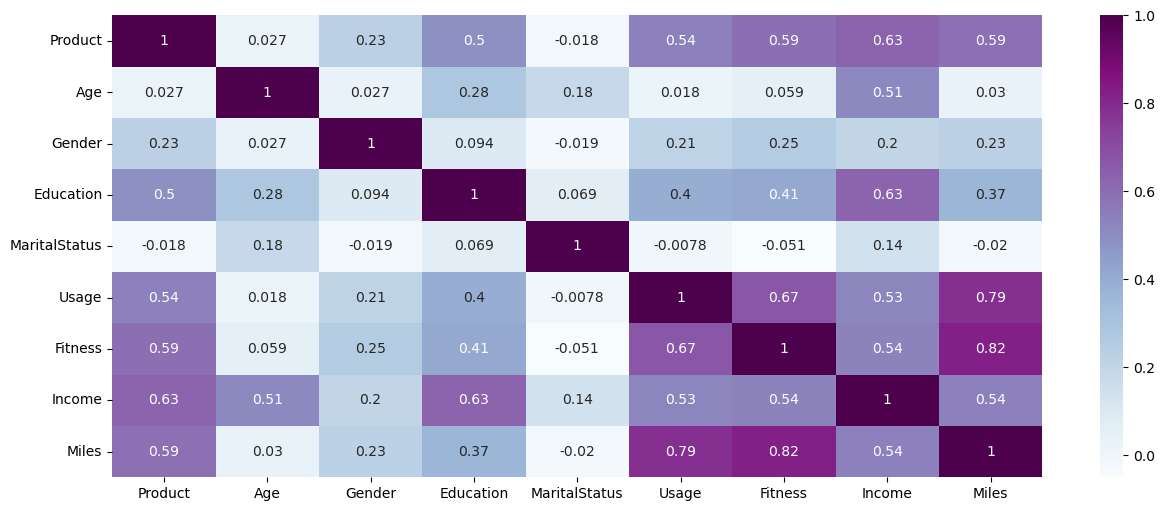

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(), cmap="BuPu", annot=True)
plt.show()

#### Outliers

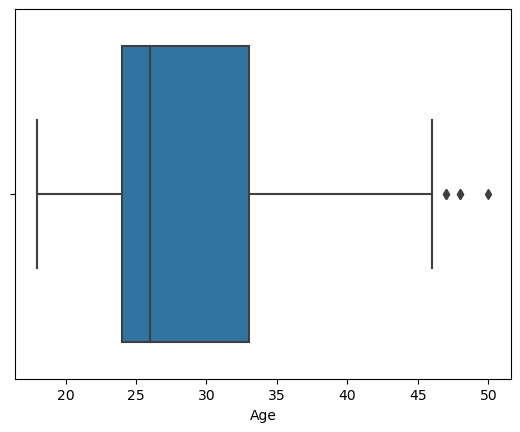

In [18]:
ax = sns.boxplot(x=df["Age"])
plt.show()

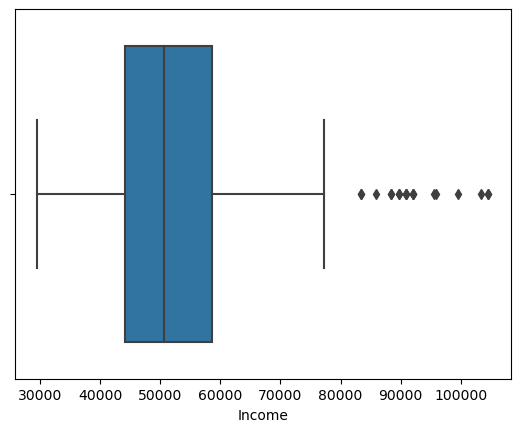

In [19]:
ax = sns.boxplot(x=df["Income"])
plt.show()

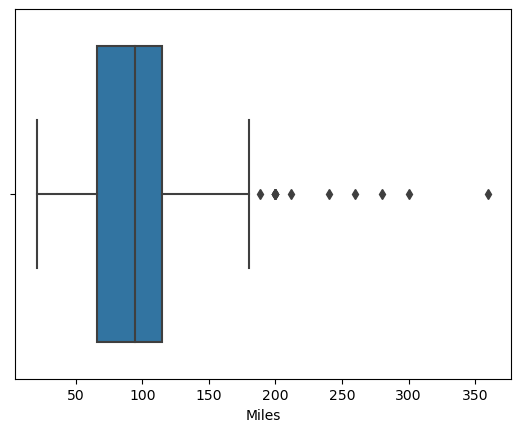

In [20]:
ax = sns.boxplot(x=df["Miles"])
plt.show()

In [23]:
num_feat=['Age', 'Income', 'Miles']
for col in num_feat:
    percentiles = df[col].quantile([0.05,0.95]).values
    df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

In [24]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

#### Continuous Variables

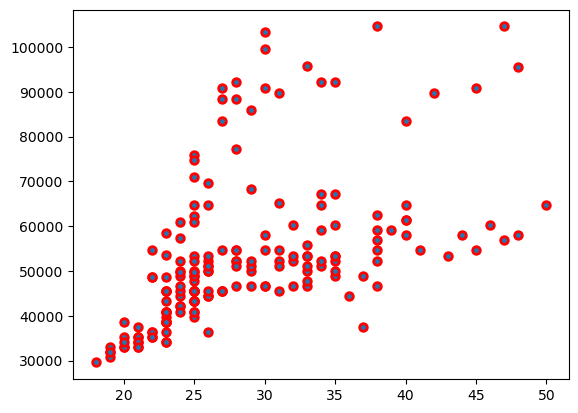

In [36]:
plt.scatter(df['Age'], df['Income'],
            linewidths = 2,
            marker ="o",
            edgecolor ="red",
            s = 30)

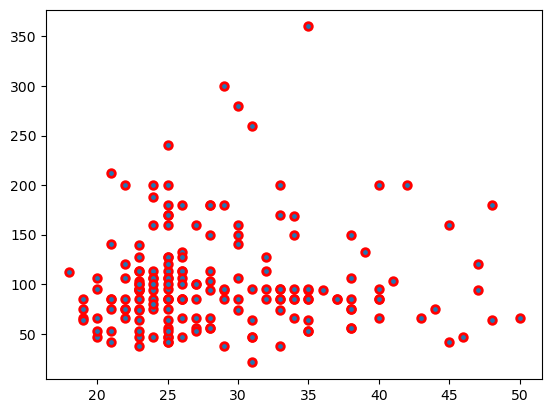

In [35]:
plt.scatter(df['Age'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="red",
            s = 30)

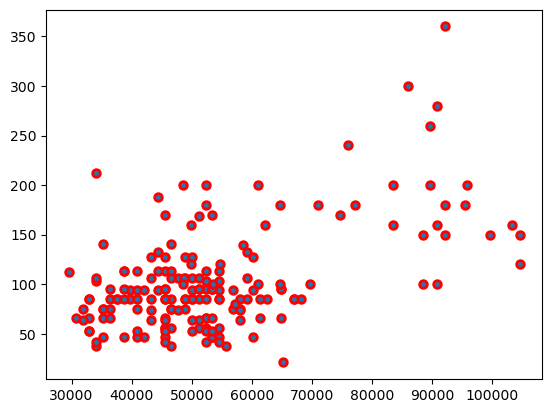

In [34]:
plt.scatter(df['Income'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="red",
            s = 30)

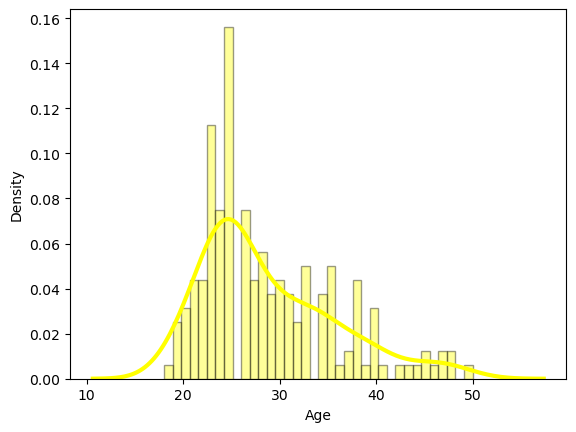

In [37]:
sns.distplot(df['Age'], hist=True, kde=True,
bins=int(36), color = 'yellow',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 3})
plt.show()

In [29]:
bins = [-1,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


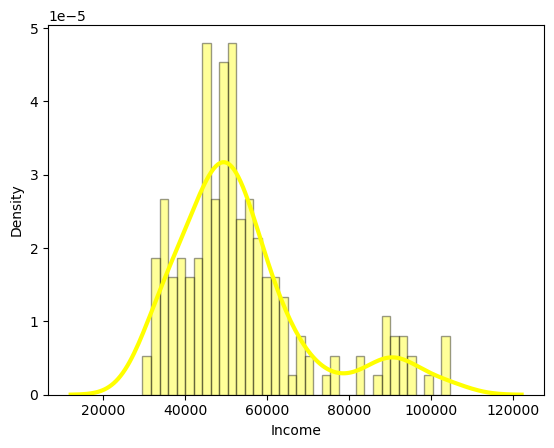

In [38]:
sns.distplot(df['Income'], hist=True, kde=True,
bins=int(36), color = 'yellow',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 3})
plt.show()

In [31]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [32]:
bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


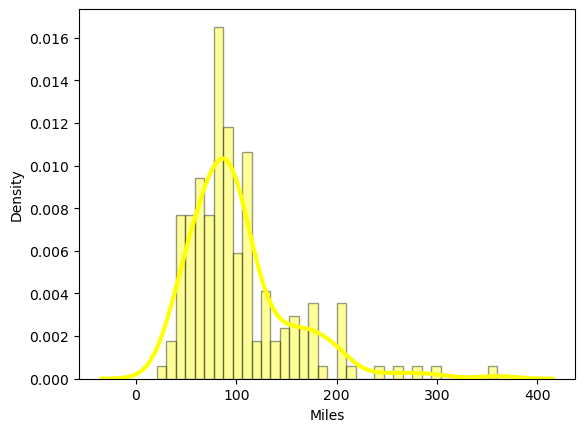

In [39]:
sns.distplot(df['Miles'], hist=True, kde=True,
bins=int(36), color = 'yellow',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 3})
plt.show()

In [40]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [41]:
bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


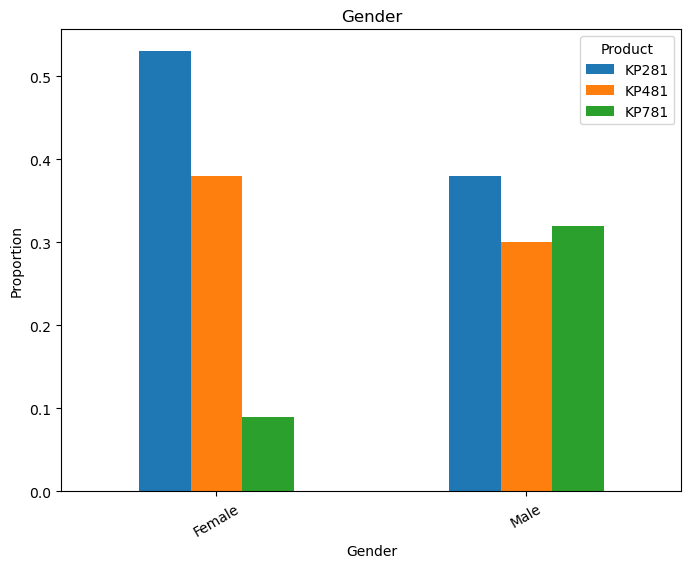

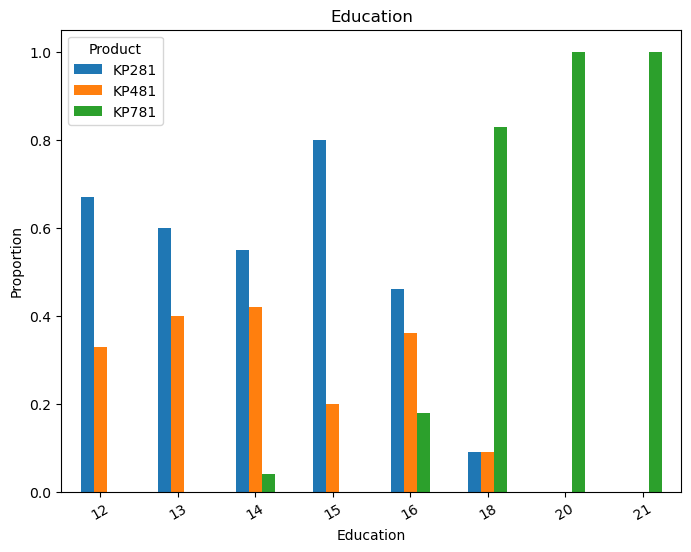

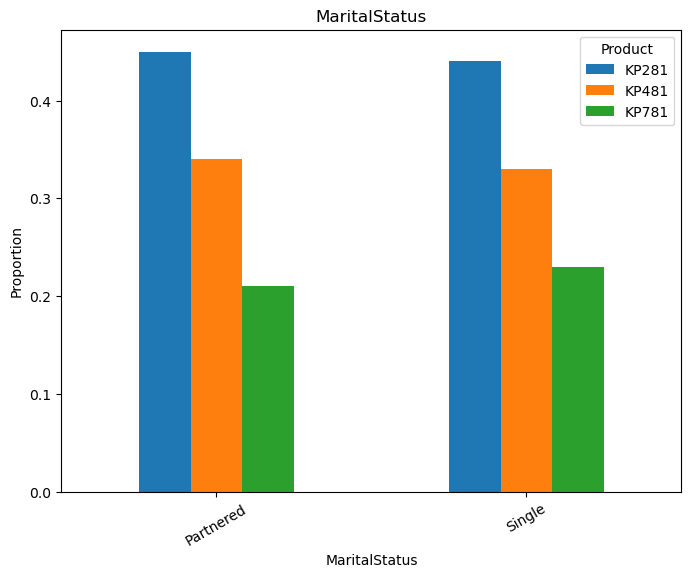

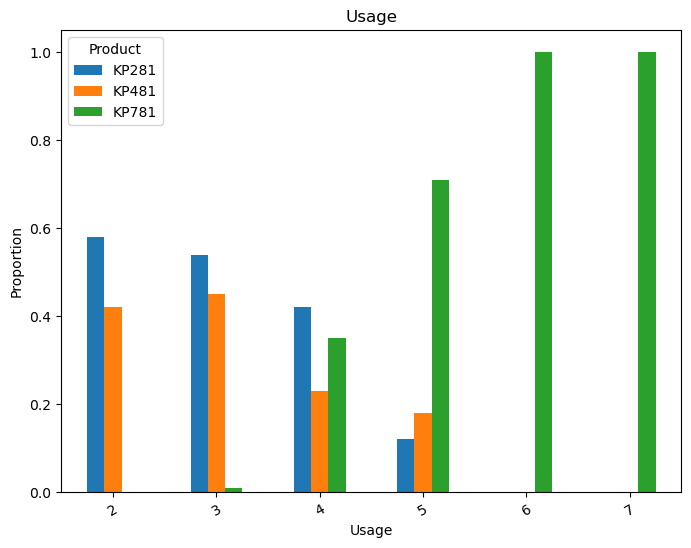

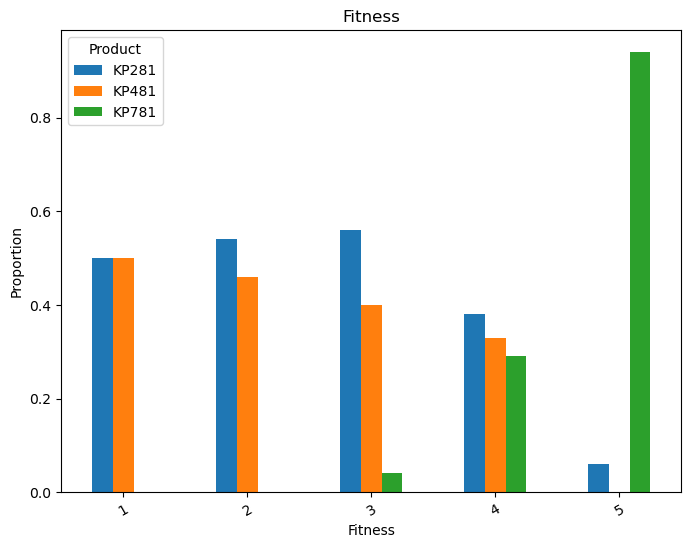

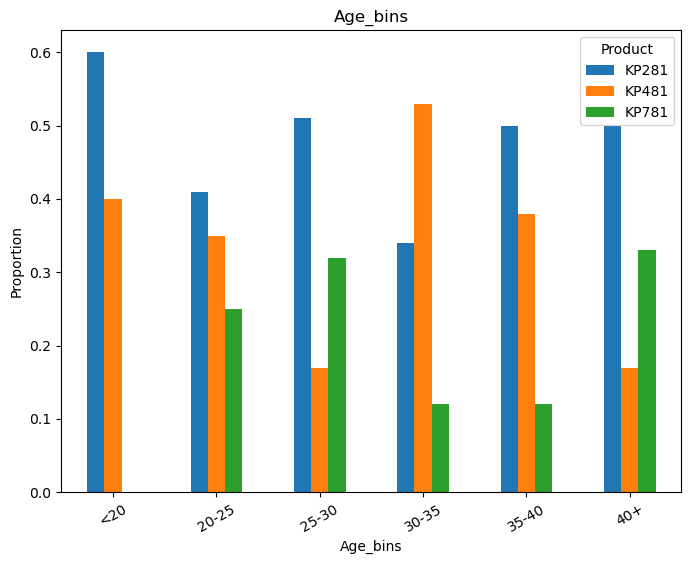

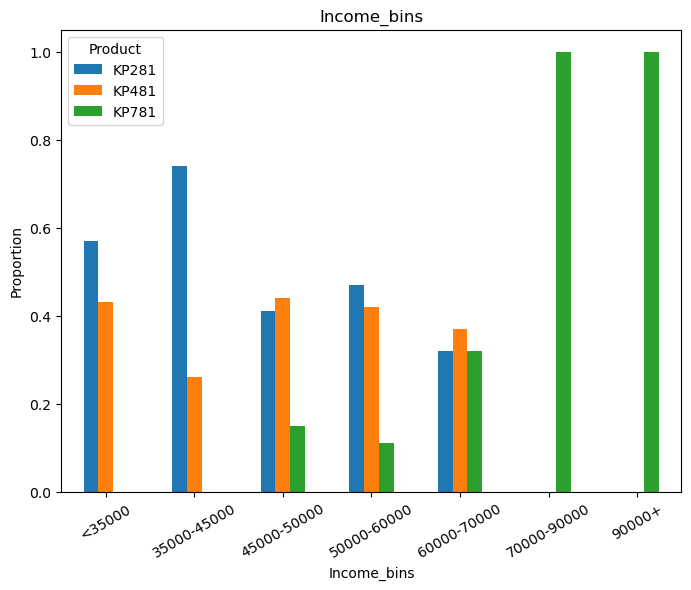

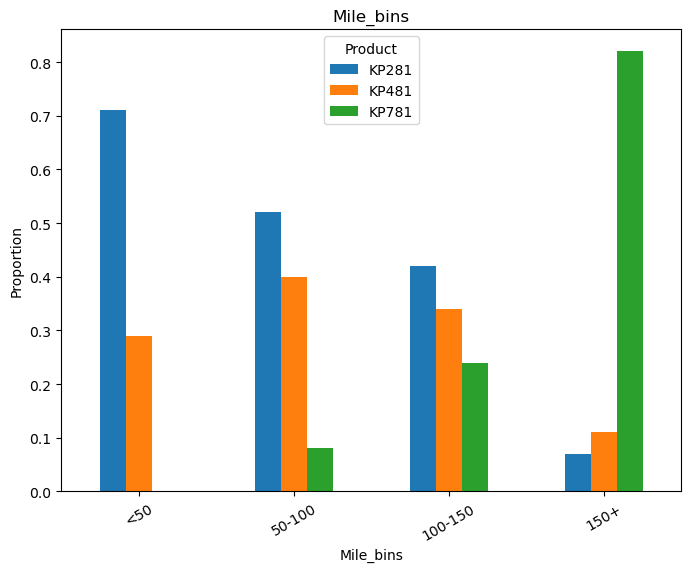

In [42]:
categorical_clm=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in categorical_clm:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (8,6))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=30)
    plt.show()

In [54]:
pd.crosstab(index=df['Gender'],columns=df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [44]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [52]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)*100
#each element divided by 180

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [55]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index')
#each element divided by summation of individual rows

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


Optimised Code

In [56]:
from IPython.display import display
for i in categorical_clm:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True, normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
70000-90000,0.000000,0.000000,1.000000
90000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Mile_bins vs Treadmill Product


Product,KP281,KP481,KP781
Mile_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


In [50]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


#### Multivariate Analysis

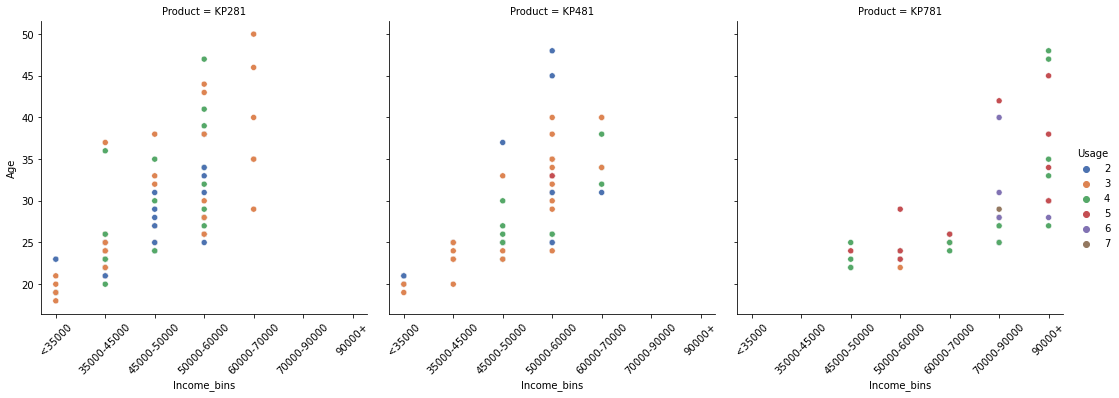

<Figure size 720x432 with 0 Axes>

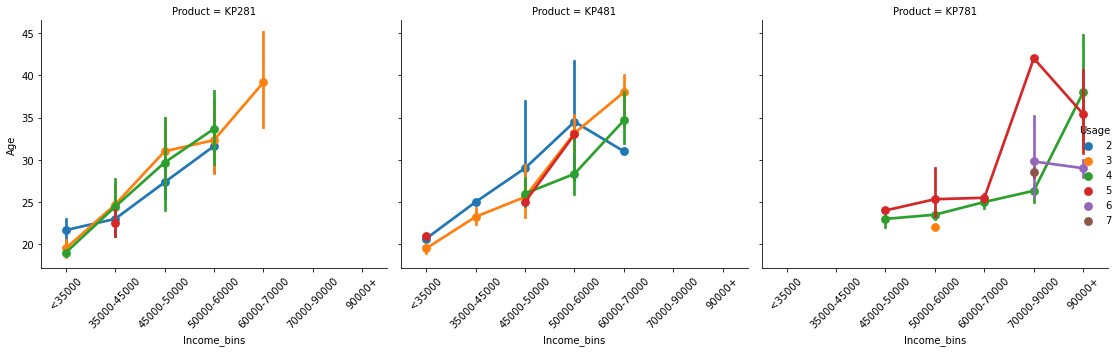

In [94]:
plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Usage', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Age',
               hue='Usage',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

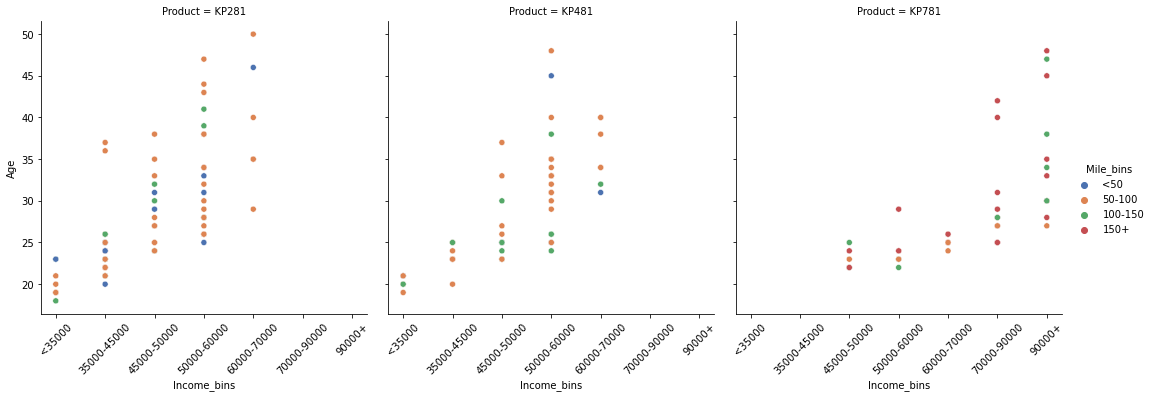

<Figure size 720x432 with 0 Axes>

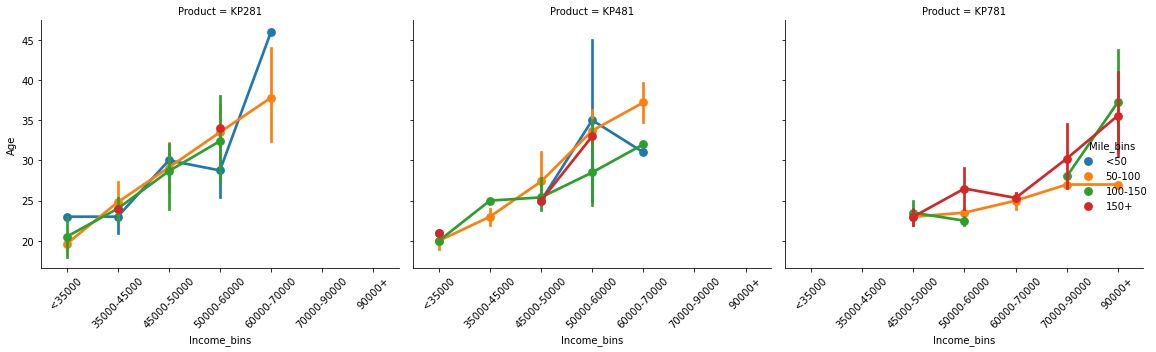

In [95]:
plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Mile_bins', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Age',
               hue='Mile_bins',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

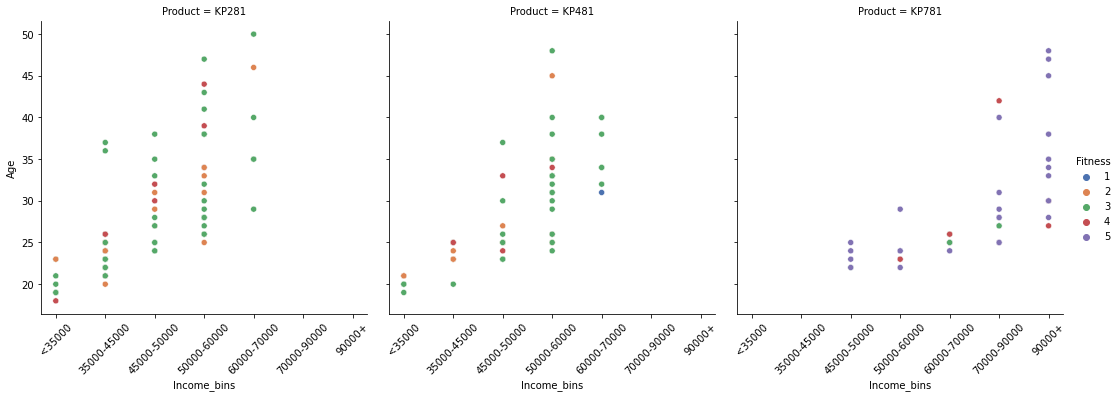

<Figure size 720x432 with 0 Axes>

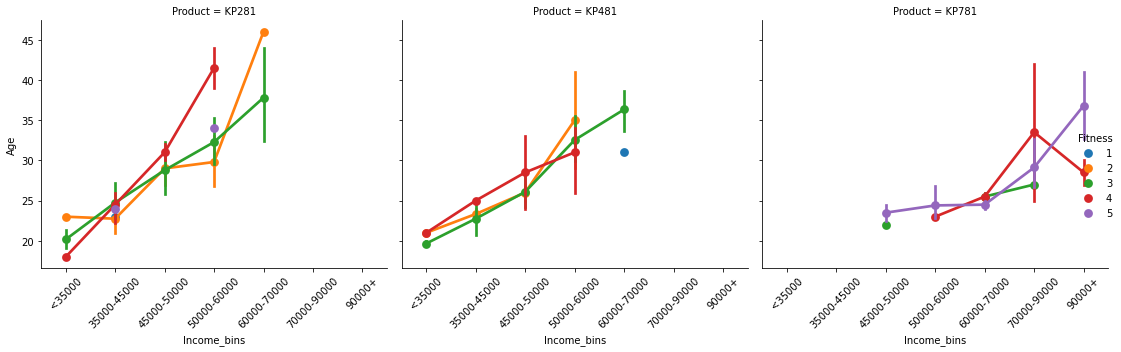

In [96]:
plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Fitness', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Age',
               hue='Fitness',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

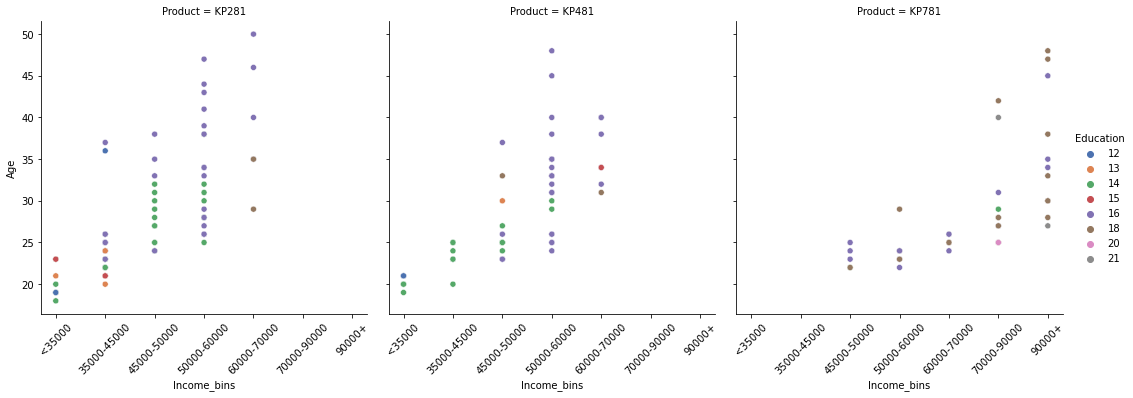

<Figure size 720x432 with 0 Axes>

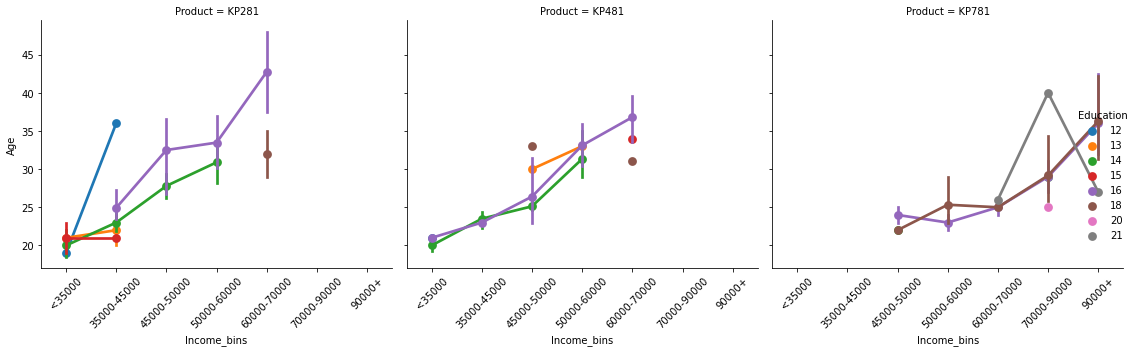

In [97]:
plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Education', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Age',
               hue='Education',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

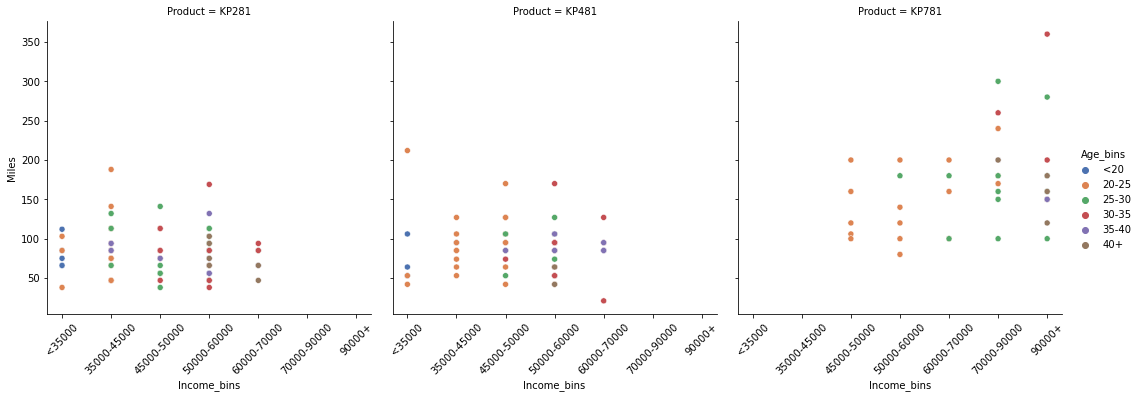

<Figure size 720x432 with 0 Axes>

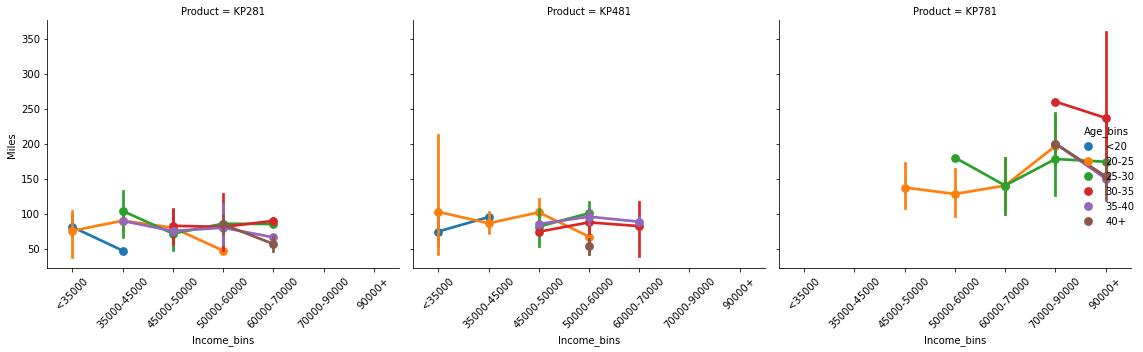

In [98]:
plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Age_bins', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Miles',
               hue='Age_bins',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

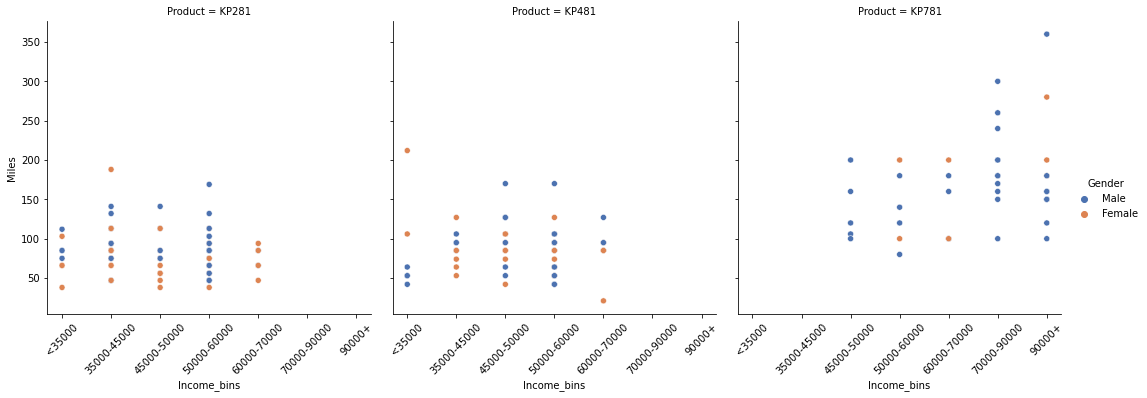

<Figure size 720x432 with 0 Axes>

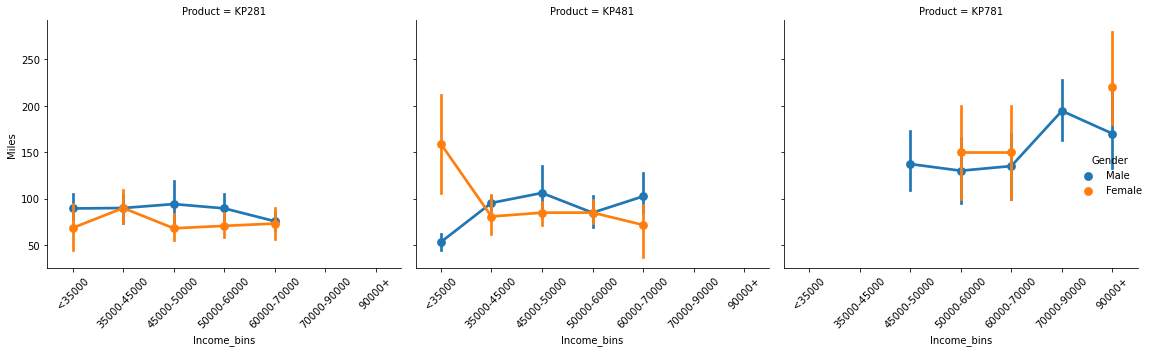

In [99]:
plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Gender', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Miles',
               hue='Gender',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

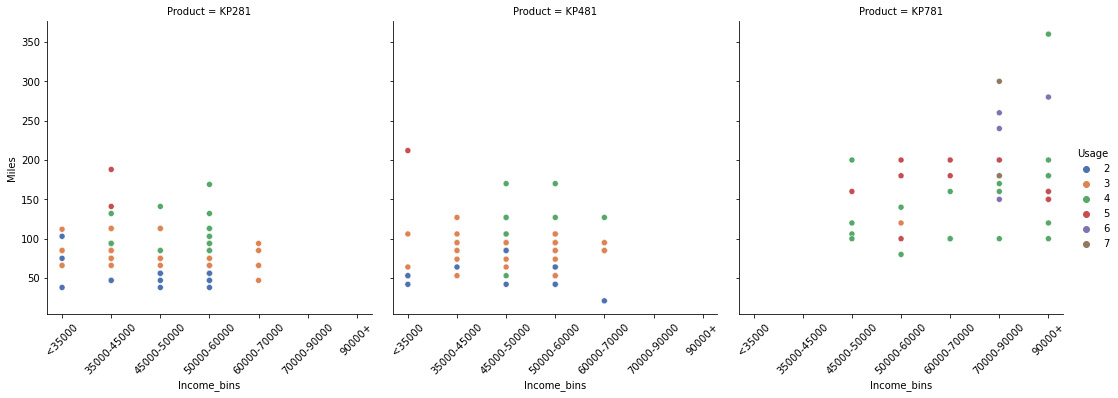

<Figure size 720x432 with 0 Axes>

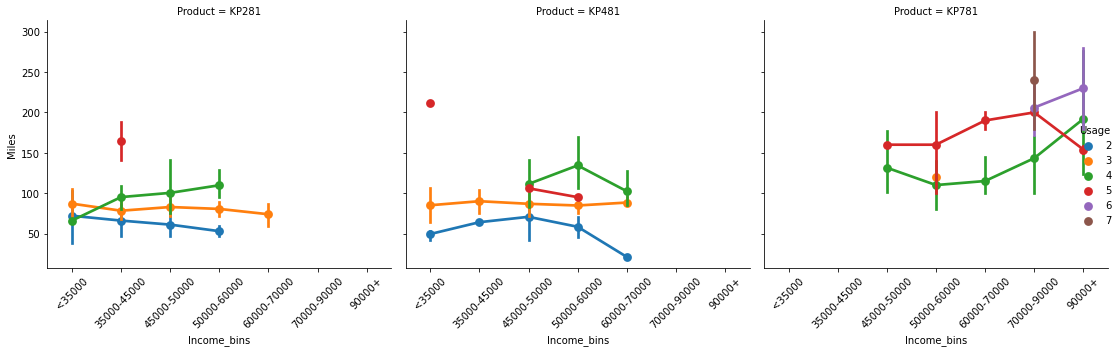

In [100]:
plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Usage', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Miles',
               hue='Usage',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

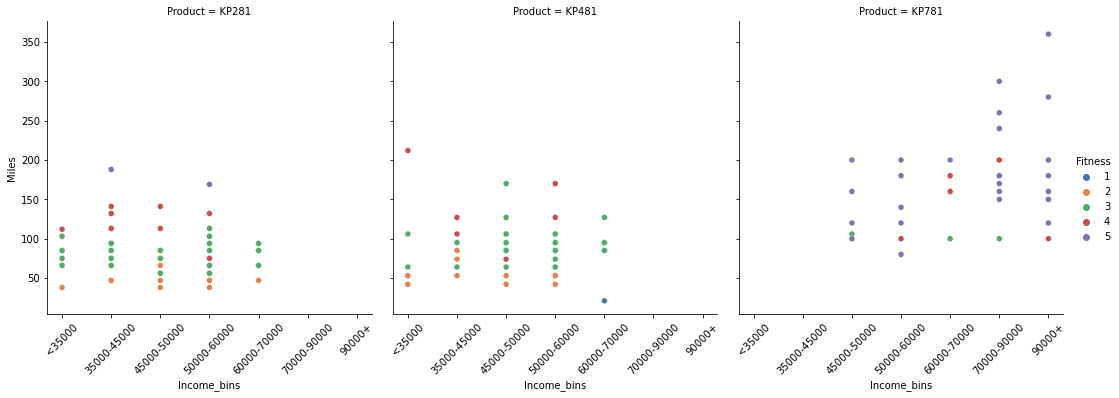

<Figure size 720x432 with 0 Axes>

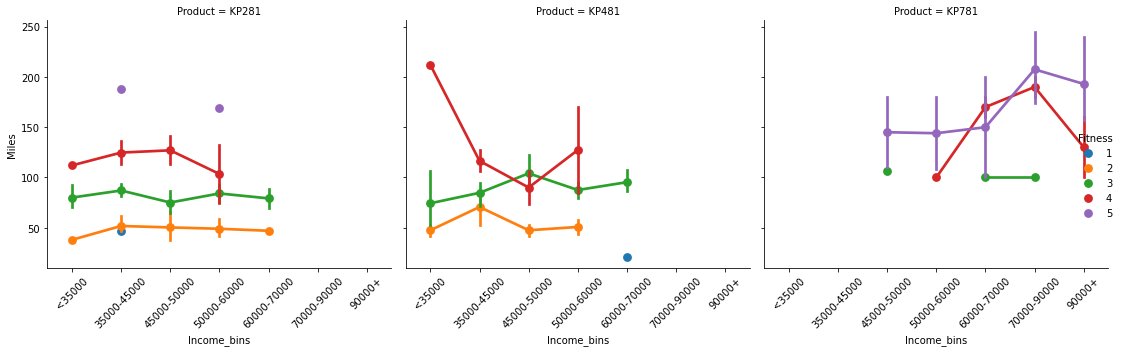

In [101]:
plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Fitness', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Miles',
               hue='Fitness',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

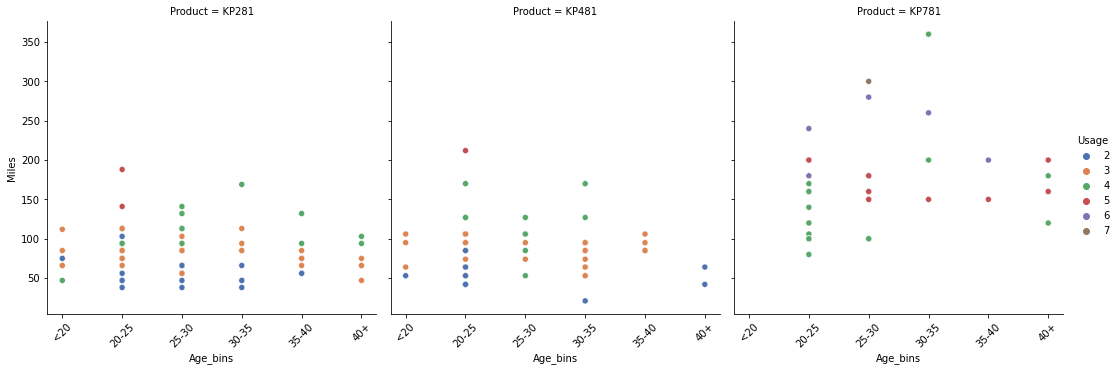

<Figure size 720x432 with 0 Axes>

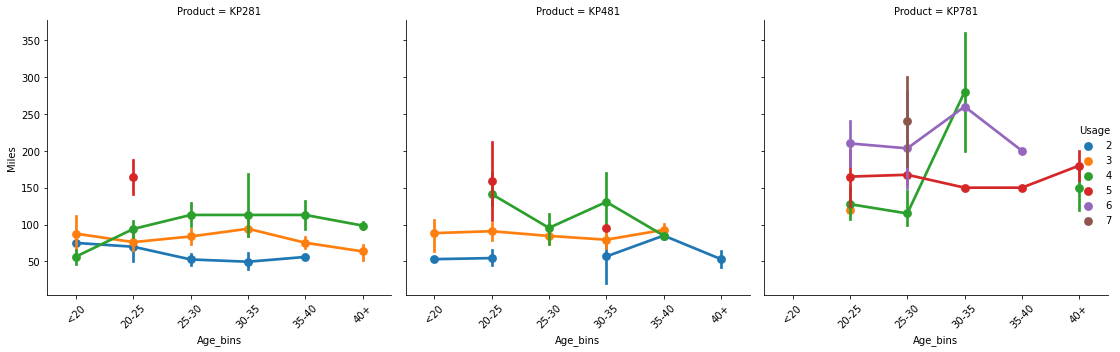

In [103]:
plot=sns.relplot(data=df, x='Age_bins', y='Miles', col='Product', hue='Usage', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Age_bins', y ='Miles',
               hue='Usage',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()


**Customer Profiles for KP281:**

1) Women having incomes below 70k and age > 40
<br>
2) Customers having income in range 60k-70k and usage days=3
<br>
3) Customers having income in range 45k-50k and usage days=2
<br>
4) Customers having income in range 35k-45k and usage days=4
<br>
5) Customers having income in range 50k-60k and usage days=4
<br>
6) Customers with Fitness=4, age closer to 40 and income 50k-60k
<br>
7) Customers with Education Level=16, Age>32 and income 45k-50k
<br>
8) Customers with Education Level=16, Age>45 and income 60k-70k
<br>
9) Customers with Age in 25-30 and 35-40 having incomes in range 35k-45k
<br>
10) Customers with 40+ Age and 60k-70k income
<br>
11) Women with incomes < 35k and whose miles run < 105
<br>
12) Customers with usages=5, incomes in range 35k-45k and who run more than 140 miles
<br>
13) Customers with Fitness=5, incomes < 70k and Incomes in 45k-50k
<br>
14) Customers with Education level=15 having incomes less than 35k
<br>
15) Customers with Usages=3, miles run < 70 and Age>40
<br>
16) Customers with Usages=2 and Age between 25-30


**Customer Profiles for KP481:**

1) Women having incomes below 70k and age between 32-37
<br>
2) Customers with age < 25, incomes in range 50-60k and the miles run is in the range 100-150
<br>
3) Customers with Fitness=4, age in range 25-32 and income 50k-60k
<br>
4) Customers with Education Level=16, Age< 22 and income 45k-50k
<br>
5) Customers with Education Level=16, Age< 35 and income 60k-70k
<br>
6) Customers with 35-40 Age and 60k-70k income
<br>
7) Women with incomes < 35k and whose miles run >105
<br>
8) Men with incomes 60k-70k and who tread in range 100-150 miles
<br>
9) Customers with Fitness=4, incomes < 45k-50k and who run more than 100 miles
<br>
10) Customers with Education level=13 having incomes in ranges 45-60k
<br>
11) Customers with Usages=2 and Age>40